In [1]:
import math
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # Calculate differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    # Calculate distance
    distance = R * c
    return distance

# Example usage
lat1 = 52.2296756
lon1 = 21.0122287
lat2 = 52.406374
lon2 = 16.9251681

distance = haversine(lat1, lon1, lat2, lon2)
print("Distance:", distance, "km")

Distance: 278.4581750754194 km


In [3]:
def euclidean_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # Earth radius in kilometers
    R = 6371
    
    # Convert latitude and longitude to Cartesian coordinates
    x1 = R * math.cos(lat1_rad) * math.cos(lon1_rad)
    y1 = R * math.cos(lat1_rad) * math.sin(lon1_rad)
    z1 = R * math.sin(lat1_rad)
    
    x2 = R * math.cos(lat2_rad) * math.cos(lon2_rad)
    y2 = R * math.cos(lat2_rad) * math.sin(lon2_rad)
    z2 = R * math.sin(lat2_rad)
    
    # Calculate Euclidean distance
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    
    return distance

# Coordinates
lat1 = 52.2296756
lon1 = 21.0122287
lat2 = 52.406374
lon2 = 16.9251681

# Calculate Euclidean distance
distance = euclidean_distance(lat1, lon1, lat2, lon2)
print("Euclidean distance:", distance, "km")

Euclidean distance: 278.436011332943 km


In [5]:
distance_haversine = haversine(40.7128, -74.0060, 34.0522, -118.2437)
print("Haversine distance:", distance_haversine, "km")
distance_euclidean = euclidean_distance(40.7128, -74.0060, 34.0522, -118.2437)
print("Euclidean distance:", distance_euclidean, "km")

Haversine distance: 3935.746254609723 km
Euclidean distance: 3873.461342615779 km


In [4]:
data = pd.read_excel("swainson's hawk.xlsx")
data.head()

,species,birdID,date,longitude,latitude
0,Swainson's hawk,SW16,1996-10-08,-98.184,28.840
1,Swainson's hawk,SW16,1996-10-09,-98.877,29.120
2,Swainson's hawk,SW16,1996-10-10,-99.299,25.879
3,Swainson's hawk,SW16,1996-10-11,-98.326,22.770
4,Swainson's hawk,SW16,1996-10-12,-96.021,17.831


In [5]:
df= pd.read_excel("swainson's hawk.xlsx")
df['date'] = pd.to_datetime(df['date'])
df.head()

,species,birdID,date,longitude,latitude
0,Swainson's hawk,SW16,1996-10-08,-98.184,28.840
1,Swainson's hawk,SW16,1996-10-09,-98.877,29.120
2,Swainson's hawk,SW16,1996-10-10,-99.299,25.879
3,Swainson's hawk,SW16,1996-10-11,-98.326,22.770
4,Swainson's hawk,SW16,1996-10-12,-96.021,17.831


In [8]:
def migratory_stretch_estimator(df, Azimuthal=True, save=False):
    # Calculate distance and time difference for each bird ID
    result_data = []

    # Iterate over each unique bird ID
    for bird_id, group_df in df.groupby('birdID'):
        first_entry = True
        # Calculate distance and time difference for each row in the group
        for index, row in group_df.iterrows():
            if first_entry:
                prev_longitude = row['longitude']
                prev_latitude = row['latitude']
                prev_date = row['date']
                first_entry = False
            else:
                if Azimuthal: distance = haversine(row['longitude'], row['latitude'], prev_longitude, prev_latitude)
                else:         distance = euclidean_distance(row['longitude'], row['latitude'], prev_longitude, prev_latitude)

                time_difference = (row['date'] - prev_date).days
                
                result_data.append({
                    'birdID': bird_id,
                    'distance': distance,
                    'time': time_difference
                })
                
                # Update previous values for the next iteration
                prev_longitude = row['longitude']
                prev_latitude = row['latitude']
                prev_date = row['date']

    # Create a new DataFrame from the result data
    result_df = pd.DataFrame(result_data)

    if save:
        result_df.to_excel(save + ".xlsx", index=False)

    return result_df

In [9]:
SWH_dist = migratory_stretch_estimator(df, save="SWH_dist")
SWH_dist

,birdID,distance,time
0,SW16,77.196132,1
1,SW16,73.753169,1
2,SW16,120.422288,1
3,SW16,265.087782,1
4,SW16,1272.416610,9
...,...,...,...
158,SW25,483.053535,6
159,SW25,419.507241,7
160,SW25,1550.947945,6
161,SW25,1504.535960,7


In [10]:
migratory_stretch_estimator(df, Azimuthal=False)

,birdID,distance,time
0,SW16,77.195659,1
1,SW16,73.752757,1
2,SW16,120.420495,1
3,SW16,265.068660,1
4,SW16,1270.302902,9
...,...,...,...
158,SW25,482.937837,6
159,SW25,419.431459,7
160,SW25,1547.121077,6
161,SW25,1501.042317,7


In [11]:
SWH_dist[SWH_dist['time'] < 3]['distance'].max()

675.1700475638635

In [12]:
def plot_bin_series(ser, fig_size=(10,6)):
    # Define the bin edges
    bin_edges = list(range(0, int(ser.max()) + 10, 10))

    # Discretize the data into bins
    binned_data = pd.cut(ser, bins=bin_edges, right=False)

    # Count the occurrences of each bin
    bin_counts = binned_data.value_counts().sort_index()

    # Plot the binned data
    bin_counts.plot(kind='bar', width=1, color='skyblue', edgecolor='black', figsize=fig_size)
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title('Series Plot in Bins of 10')
    plt.show()

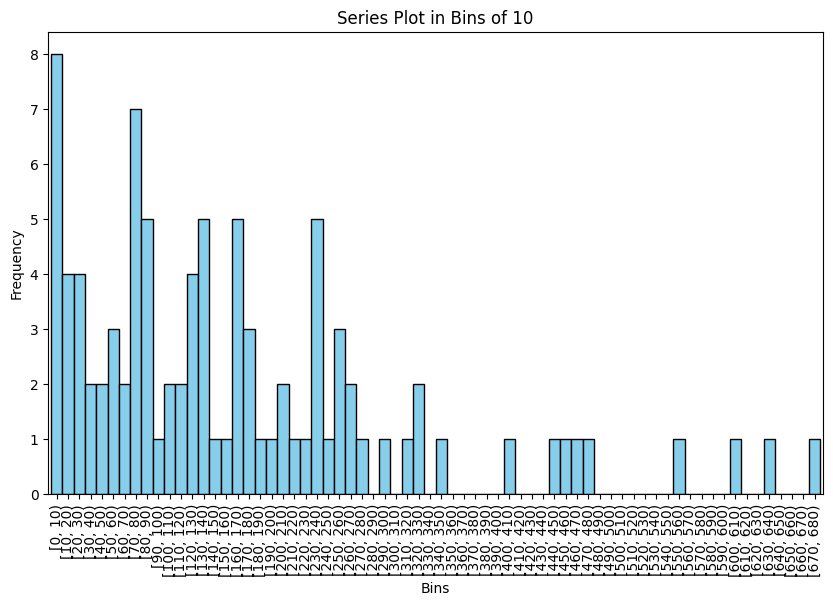

In [13]:
plot_bin_series(ser = SWH_dist[SWH_dist['time'] < 3]['distance'])

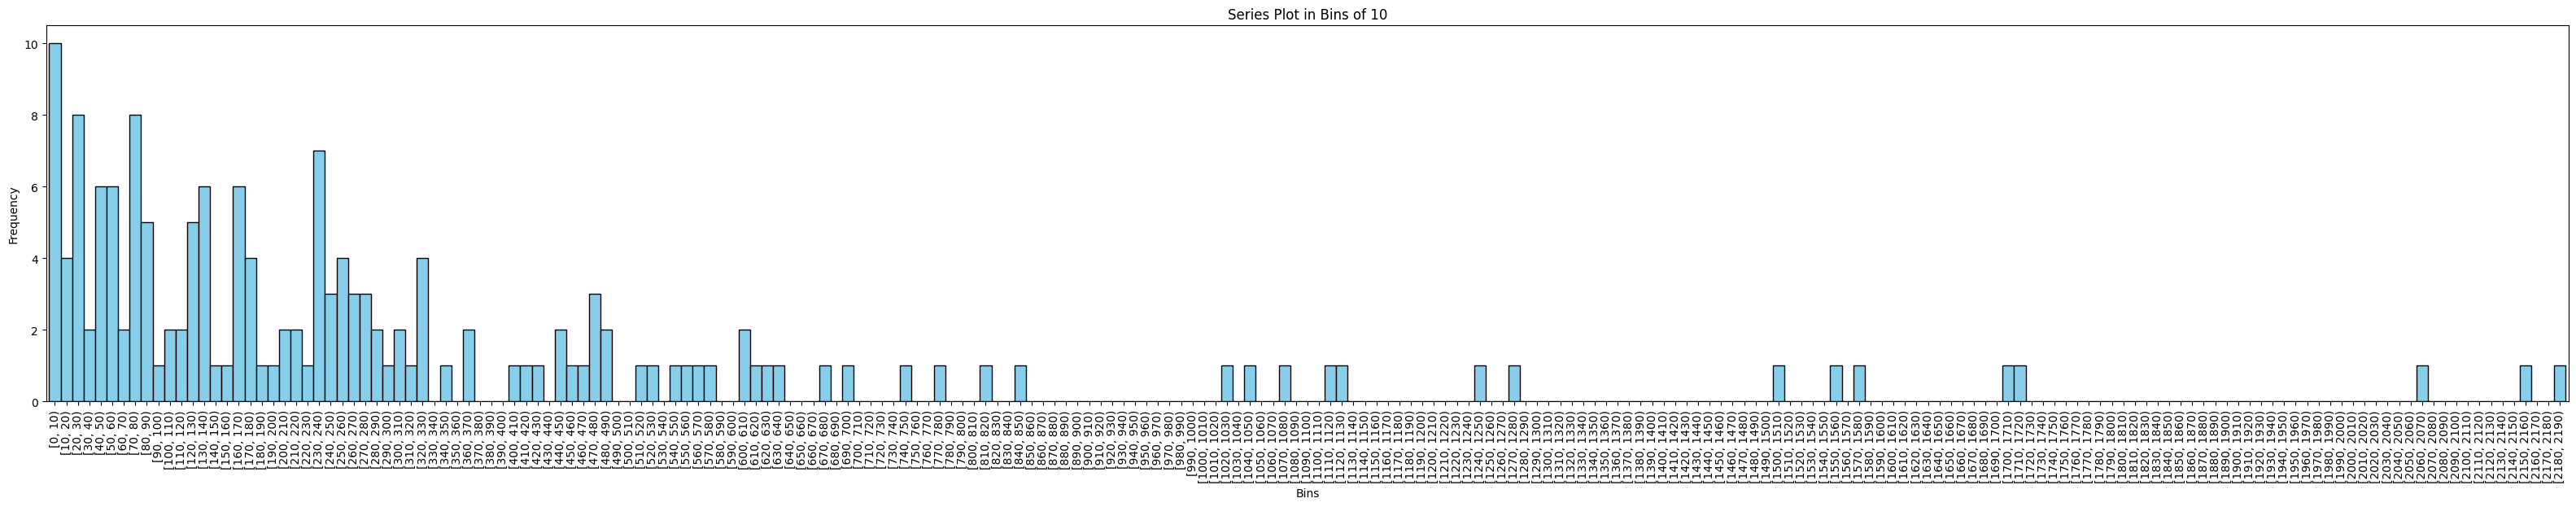

In [14]:
plot_bin_series(ser = SWH_dist['distance'], fig_size=(40,6))

In [15]:
# SWH_dist[SWH_dist['distance'] < 676].to_excel("sf.xlsx", index=False)

SWH_dist[SWH_dist['distance'] < 676]['distance'].median()

164.6042245086196

In [16]:
SWH_dist[SWH_dist['distance'] < 676]['distance'].mean()

204.56065097571147

In [17]:
SWH_dist['distance'].sort_values()[:5]

125    0.679393
128    1.497091
77     2.026144
151    2.745103
83     5.004273
Name: distance, dtype: float64

In [18]:
SWH_dist[SWH_dist['distance'] >= 676]#[SWH_dist['time'] >= 3]

,birdID,distance,time
4,SW16,1272.416610,9
18,SW16,745.058228,5
27,SW16,1075.535599,6
30,SW16,2159.877381,11
31,SW16,2186.527844,35
62,SW17,815.487497,6
66,SW17,1576.392305,6
67,SW17,1247.573043,6
68,SW17,2069.407950,12
107,SW18,1029.494314,12


In [6]:
SWH_migratory_stretch = 676
SWH_median_migration = 165
SWH_mean_migration = 205

In [11]:
def create_migration_network(data, max_migration):
    groups = []
    for bird_id, group_df in data.groupby('birdID'):
        groups.append(group_df)

    """
    Create a migration network graph based on groups of bird movements.
    
    Parameters:
        - groups: A list of DataFrame groups, each containing longitude and latitude columns for a bird's movements.
        - max_migration: Maximum migration distance in kilometers to consider for creating additional edges.
        
    Returns:
        A NetworkX graph representing the migration network.
    """
    # Create an empty graph
    migration_network = nx.Graph()

    # Iterate over each group of bird movements
    for bird_group in groups:
        # Extract latitude and longitude coordinates for the bird's movements
        points = list(zip(bird_group['latitude'], bird_group['longitude']))
        
        # Add edges based on the original connections
        for i in range(len(points) - 1):
            migration_network.add_edge(points[i], points[i + 1])

    # Iterate again to add additional edges based on maximum migration distance
    all_nodes = migration_network.nodes()
    for node1 in all_nodes:
        for node2 in all_nodes:
            if node1 != node2:
                # Calculate distance between two nodes using Haversine formula
                distance = haversine(node1[0], node1[1], node2[0], node2[1])
                # If distance is less than max_migration, add an edge between the two nodes
                if distance < max_migration:
                    migration_network.add_edge(node1, node2)

    return migration_network

In [12]:
SWH_network = create_migration_network(data, SWH_migratory_stretch)

In [20]:
mean_deg=np.array([i for _,i in SWH_network.degree()]).mean()
size=len(np.array([i for _,i in SWH_network.degree()]))
sum=np.array([i for _,i in SWH_network.degree()]).sum()

In [21]:
from scipy.stats import poisson
from scipy.stats import chisquare
import numpy as np

# Example data (replace this with your actual degree distribution data)
observed_degrees = np.array([i for u,i in SWH_network.degree()]) # observed frequencies

# Calculate expected frequencies assuming a Poisson distribution
lambda_param = mean_deg
expected_degrees = poisson.pmf(np.arange(size), lambda_param) * sum

# Perform Chi-square goodness-of-fit test
chi_square_stat, p_value = chisquare(observed_degrees, f_exp=expected_degrees, ddof=1)

# Print results
print("Chi-square statistic:", chi_square_stat)
print("p-value:", p_value)


Chi-square statistic: 5.575266019991158e+93
p-value: 0.0


In [23]:
def compute_Po_P_infinity(network):
    # Step 1: Calculate total number of nodes in the network
    total_nodes = len(network.nodes())
    
    # Step 2: Identify the largest connected component
    largest_connected_component = max(nx.connected_components(network), key=len)
    num_nodes_lcc = len(largest_connected_component)
    
    # Step 3: Compute Po
    Po = total_nodes / total_nodes
    
    # Step 4: Compute P_infinity
    P_infinity = num_nodes_lcc / total_nodes
    
    # Step 5: Compute Po/P_infinity
    Po_over_P_infinity = Po / P_infinity
    
    return Po_over_P_infinity

# Example usage with a NetworkX graph 'network'
import networkx as nx

# Assuming 'network' is your graph
Po_P_infinity = compute_Po_P_infinity(SWH_network)
print("Po/P_infinity:", Po_P_infinity)


Po/P_infinity: 1.0


In [24]:
print(SWH_network)

Graph with 167 nodes and 1566 edges


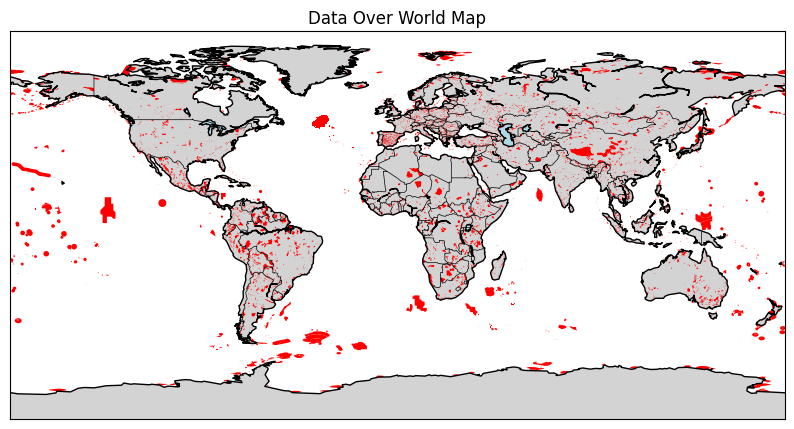

In [36]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import geopandas as gpd


# Read the world shapefile
world_map = Basemap()

# Create a figure and axis with Basemap projection
fig, ax = plt.subplots(figsize=(10, 10))
ax = plt.gca()

# Draw coastlines, countries, and continents
world_map.drawcoastlines()
world_map.drawcountries()
world_map.fillcontinents(color='lightgrey', lake_color='lightblue')

# Plot the data from the shapefile
# Replace 'path/to/data.shp' with the actual path to your shapefile
data = gpd.read_file('data/IBAsGlobal_2023_September_POL_02.shp')
data.plot(ax=ax, color='red', markersize=5)

# Add title
plt.title('Data Over World Map')

# Show the plot
plt.show()

In [59]:
data.head()

,SitRecID,Region,Country,ISO3,NatName,IntName,SitLat,SitLong,GISArea,IbaStatus,KbaStatus,AzeStatus,AddedDate,ChangeDate,Source,DelTxt,DelGeom,geometry
0,19,Europe,Andorra,AND,IBA D'Andorra,Pirineo de Andorra,42.550661,1.576233,47463.152932,confirmed,None,None,2009-06-17,None,IBA Directory description used to define bound...,Political layer used to provide boundary data,3. draft polygon,"POLYGON ((1.43992 42.60649, 1.45041 42.60597, ..."
1,35,Europe,Czechia,CZE,Sumava,Sumava mountains (Bohemian forest),48.978842,13.618011,97502.099922,confirmed,None,None,2008-02-25,None,"CSO, 250208, following European updates by Rob...",None,3. draft polygon,"POLYGON ((13.08431 49.24580, 13.08420 49.24598..."
2,36,Europe,Czechia,CZE,Trebonsko,Trebonsko (Trebon region),49.037377,14.841155,47374.548924,confirmed,None,None,2008-02-25,None,"CSO, 250208, following European updates by Rob...",None,3. draft polygon,"POLYGON ((14.74880 49.03006, 14.74882 49.02989..."
3,37,Europe,Czechia,CZE,Dehtár,Dehtár pond,49.006917,14.292891,352.051124,confirmed,None,None,2008-02-25,None,"CSO, 250208, following European updates by Rob...",None,3. draft polygon,"POLYGON ((14.29820 49.01458, 14.30028 49.01535..."
4,38,Europe,Czechia,CZE,Rezabinec,Rezabinec pond,49.253789,14.092108,111.066470,confirmed,None,None,2008-02-25,None,"CSO, 250208, following European updates by Rob...",None,3. draft polygon,"POLYGON ((14.09445 49.24842, 14.09404 49.24840..."


In [71]:
str(data['geometry'][0])

'POLYGON ((1.4399195197700578 42.606489573934766, 1.4504094288520832 42.60596961110872, 1.459009588022127 42.60906949865847, 1.4621994221656678 42.613529492991745, 1.4700594177080006 42.64976953823367, 1.4749094713950512 42.65244944238793, 1.4821794478232846 42.65372945914726, 1.4955995621701277 42.650179488792446, 1.5112394632307087 42.652949514908244, 1.5171595428786304 42.6539894414596, 1.5215294143510505 42.652989471786725, 1.5544094152623416 42.6587095925737, 1.5628295058770618 42.657169593501976, 1.57110948481494 42.649489491147165, 1.5949695185285009 42.63951954399181, 1.6136795611628827 42.63548956679011, 1.6287195865397166 42.635789505081675, 1.6558395097856078 42.62630959760992, 1.6634895136302248 42.626619568738136, 1.6676094365263339 42.627899586396836, 1.6901994863172831 42.6349095814121, 1.6954295674206605 42.63437958485002, 1.7015795290720348 42.628039521806556, 1.7177295363890153 42.62225955473474, 1.7325294706586192 42.619739477195196, 1.7361994870167337 42.61770943843

In [73]:
from shapely.geometry import Point, Polygon, MultiPolygon
import pandas as pd

def point_inside_polygon(latitude, longitude, df):
    # Create a shapely Point object from the latitude and longitude
    point = Point(longitude, latitude)
    
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Extract the polygon geometry from the row
        geometry = row['geometry']
        
        # Check if the point is inside the polygon
        if point.within(geometry):
            # If inside, return True
            return True
    
    # If the point is not inside any polygon, return False
    return False

# Example usage:
# Assuming you have a DataFrame named 'data' containing the polygons
latitude = -12.056
longitude = -66.116
is_inside_polygon = point_inside_polygon(latitude, longitude, data)

print(f"The point ({latitude}, {longitude}) is inside a polygon: {is_inside_polygon}")

The point (-12.056, -66.116) is inside a polygon: False


In [66]:
def find_closest_point(lat, lon):
    def haversine(lat1, lon1, lat2, lon2):
        # Convert coordinates to radians
        lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

        # Haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * math.asin(sqrt(a))
        r = 6371  # Radius of the Earth in kilometers
        return c * r

    closest_point = None
    min_distance = float('inf')

    for index, row in data.iterrows():
        point_lat = row['SitLat']
        point_lon = row['SitLong']
        distance = haversine(lat, lon, point_lat, point_lon)
        if distance < min_distance:
            min_distance = distance
            closest_point = row['IntName']

    return closest_point, min_distance

# Example usage:
point_name, min_dist = find_closest_point(-12.056, -66.116) 
print("Closest point:", point_name)
print("Minimum distance:", min_dist)
point_name, min_dist = find_closest_point(-6.011, -70.692) 
print("Closest point:", point_name)
print("Minimum distance:", min_dist)
point_name, min_dist = find_closest_point(1.248, -74.331) 
print("Closest point:", point_name)
print("Minimum distance:", min_dist)
point_name, min_dist = find_closest_point(16.873, -93.871) 
print("Closest point:", point_name)
print("Minimum distance:", min_dist)

Closest point: Cerrado de Riberalta
Minimum distance: 103.12369399857347
Closest point: Baixo Rio Javari
Minimum distance: 196.94760619791901
Closest point: Riberas del Río Duda
Minimum distance: 154.74398335129604
Closest point: El Ocote
Minimum distance: 26.50468861262013


In [80]:
point_inside_polygon(42.550661,	1.576233,data)

True

In [33]:
# import networkx as nx

# # Generate a graph
# G = nx.Graph()
# G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

# Calculate node betweenness centrality
betweenness_centrality = nx.betweenness_centrality(SWH_network)

lst=[]
# Print the node betweenness centrality values
for node, centrality in betweenness_centrality.items():
    lst.append([centrality,node])
    if(centrality>0.2):
        print(f"Important Node {node} with centraility = {centrality}")
        

# print(max(lst))

Important Node (-12.056, -66.116) with centraility = 0.20706839409443817
Important Node (-6.011, -70.692) with centraility = 0.2507450834641664
Important Node (1.248, -74.331) with centraility = 0.3008657131377322
Important Node (16.873, -93.871) with centraility = 0.28650218116614684


In [8]:
from shapely import wkt

# WKT string representing a polygon
polygon_wkt = "POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))"

# Create a Shapely Polygon object from the WKT string
polygon = wkt.loads(polygon_wkt)

print(type(polygon))

<class 'shapely.geometry.polygon.Polygon'>


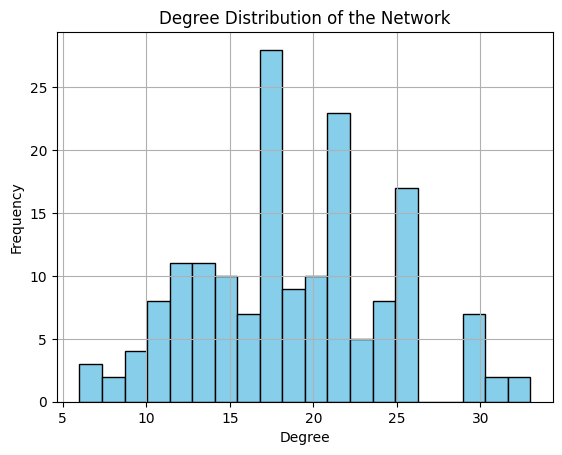

In [23]:
degrees = dict(SWH_network.degree())
# Plot degree distribution
plt.hist(list(degrees.values()), bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution of the Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
def plot_migration_network_on_world_map(migration_network):
    """
    Plot the migration network on a world map using latitude and longitude values for node positions.
    
    Parameters:
        - migration_network: NetworkX graph representing the migration network.
    """
    # Create a new figure
    plt.figure(figsize=(10, 8))

    # Create a Basemap instance for world map projection
    m = Basemap(projection='mill', llcrnrlat=-40, urcrnrlat=45, llcrnrlon=-130, urcrnrlon=-40)

    # Draw coastlines, countries, and states
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Draw meridians and parallels
    m.drawmeridians(range(-180, 181, 30), labels=[0,0,0,1], fontsize=10)
    m.drawparallels(range(-90, 91, 30), labels=[1,0,0,0], fontsize=10)

    # Convert latitude and longitude coordinates to map coordinates
    pos = {node: m(node[1], node[0]) for node in migration_network.nodes()}

    # Draw nodes
    nx.draw_networkx_nodes(migration_network, pos, node_size=10, node_color='blue', alpha=0.5)

    # Draw edges
    nx.draw_networkx_edges(migration_network, pos, width=0.5, alpha=0.5)

    plt.title('Migration Network on World Map')
    plt.show()

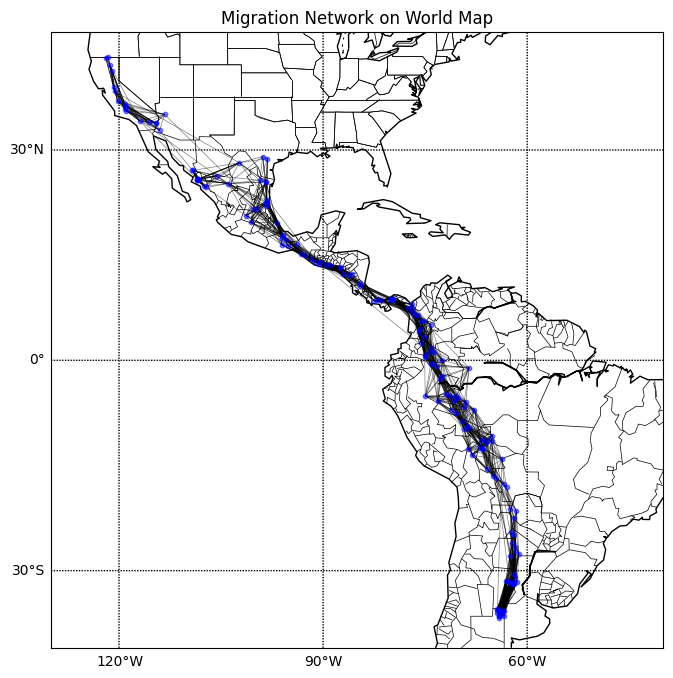

In [25]:
plot_migration_network_on_world_map(SWH_network)

In [14]:
def estimate_k_bisection(d_prime, tolerance=0.01, max_iterations=1000):
    # Define the function f(d) = e^-kd
    def f(d, k):
        return math.exp(-k * d)
    
    # Define the target value
    target_value = 0.5
    
    # Define the initial bounds for k
    lower_bound = 0
    upper_bound = 1
    # lies in 0 to 1 since k has dimension (km)^-1
    
    # Perform bisection search
    iterations = 0
    while iterations < max_iterations:
        # Calculate the midpoint and the corresponding function value
        midpoint = (lower_bound + upper_bound) / 2
        result = f(d_prime, midpoint)
        
        # Check if the result is within tolerance of the target value
        if abs(result - target_value) < tolerance:
            return midpoint
        
        # Update the bounds based on the sign of the result
        if result < target_value:
            upper_bound = midpoint
        else:
            lower_bound = midpoint
        
        iterations += 1
    
    # If max_iterations is reached without convergence, return None
    return None

In [27]:
k_SWH = estimate_k_bisection(SWH_median_migration)
print("Estimated value of Dispersal Constant, k:", k_SWH)

n_SWH = df["birdID"].nunique()
print("No. of Swainson's Hawk, n :", n_SWH)

Estimated value of Dispersal Constant, k: 0.004150390625
No. of Swainson's Hawk, n : 4


In [28]:
#  p ( d )  is the probability of dispersing at least distance d, and k is the dispersal coefficient
def p(d, k):
    return math.exp(-k * d)

print(p(SWH_median_migration, k_SWH))
print(p(SWH_median_migration, 1/SWH_mean_migration))

print(p(SWH_migratory_stretch, k_SWH))
print(p(SWH_migratory_stretch, 1/SWH_mean_migration))

# max dist
print(p(2186, k_SWH))
print(p(2186, 1/SWH_mean_migration))

# min dist
print(p(0.68, k_SWH))
print(p(0.68, 1/SWH_mean_migration))

0.504183770619497
0.4471424528019328
0.060466604233003825
0.03697323614139773
0.00011475009211830982
2.3385026486803328e-05
0.9971817132226273
0.9966884222385741


In [13]:
def weight_of_edge(n, k, d):
    return n * p(d, k)

In [16]:
edges = list(SWH_network.edges())[:2]
for u, v in edges:
    print(SWH_network[u][v])

{}
{}


In [19]:
for u, v in SWH_network.edges():
    # Assuming you have distance d between nodes u and v
    # Calculate the weight of the edge using the custom function
    weight = weight_of_edge(n_SWH, k_SWH, haversine(u[0], u[1], v[0], v[1]))
    
    # Assign the weight as an attribute to the edge
    SWH_network[u][v]['weight'] = weight

In [32]:
edges = list(SWH_network.edges())[:10]
for u, v in edges:
    print(SWH_network[u][v]["weight"], end = " , ")

2.939145780107299 , 0.9468813787667262 , 0.24276890047096933 , 0.28341687735655735 , 0.7342132108791013 , 0.913188179939009 , 0.9234597147892838 , 0.2520353482918762 , 0.8874768017542713 , 0.24659404604061438 , 

In [26]:
SWH_network.edges()

EdgeView([((28.84, -98.184), (29.12, -98.877)), ((28.84, -98.184), (25.879, -99.299)), ((28.84, -98.184), (22.77, -98.326)), ((28.84, -98.184), (23.105, -98.297)), ((28.84, -98.184), (28.277, -102.317)), ((28.84, -98.184), (25.646, -98.416)), ((28.84, -98.184), (25.67, -98.411)), ((28.84, -98.184), (22.85, -98.235)), ((29.12, -98.877), (25.879, -99.299)), ((29.12, -98.877), (23.105, -98.297)), ((29.12, -98.877), (28.277, -102.317)), ((29.12, -98.877), (25.646, -98.416)), ((29.12, -98.877), (25.67, -98.411)), ((29.12, -98.877), (25.437, -103.972)), ((25.879, -99.299), (22.77, -98.326)), ((25.879, -99.299), (23.105, -98.297)), ((25.879, -99.299), (22.38, -98.355)), ((25.879, -99.299), (28.277, -102.317)), ((25.879, -99.299), (26.49, -105.646)), ((25.879, -99.299), (21.875, -99.654)), ((25.879, -99.299), (21.95, -100.339)), ((25.879, -99.299), (20.007, -100.626)), ((25.879, -99.299), (20.94, -101.334)), ((25.879, -99.299), (25.646, -98.416)), ((25.879, -99.299), (25.67, -98.411)), ((25.87

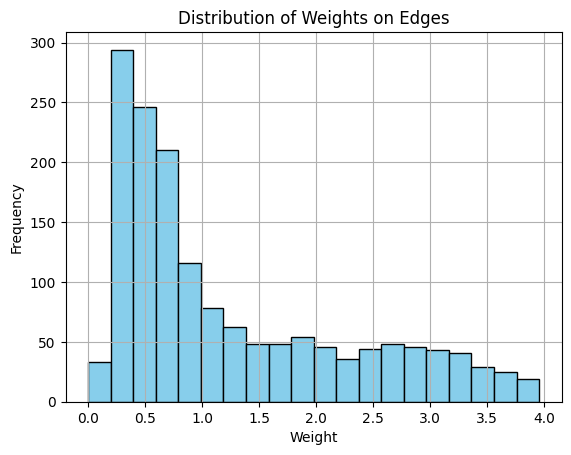

In [27]:
# Extract the weights from the edges
weights = [SWH_network[u][v]["weight"] for u,v in SWH_network.edges()]

# Plot the distribution of weights
plt.hist(weights, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Weights on Edges')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


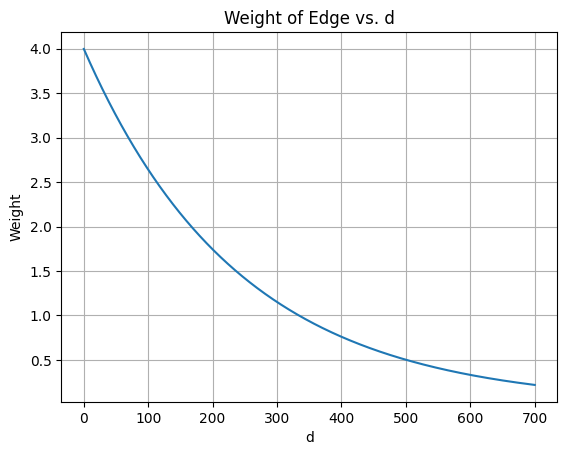

In [56]:
n = 4
k = 0.004150390625

d_values = np.linspace(0.1, 700, 7000)  # Vary d from 0.1 to 700

weights = [weight_of_edge(n, k, d) for d in d_values]

plt.plot(d_values, weights)
plt.xlabel('d')
plt.ylabel('Weight')
plt.title('Weight of Edge vs. d')
plt.grid(True)
plt.show()


In [79]:
import matplotlib.patches as mpatches

def plot_weighted_migration_network_on_world_map(migration_network):
    """
    Plot the migration network on a world map using latitude and longitude values for node positions.
    
    Parameters:
        - migration_network: NetworkX graph representing the migration network.
    """
    # Create a new figure
    plt.figure(figsize=(10, 20))

    # Create a Basemap instance for world map projection
    m = Basemap(projection='mill', llcrnrlat=-40, urcrnrlat=45, llcrnrlon=-130, urcrnrlon=-58)

    # Draw coastlines, countries, and states with reduced opacity
    m.drawcoastlines(linewidth=0.2)
    m.drawcountries(linewidth=0.2)
    m.drawstates(linewidth=0.2)

    # Draw meridians and parallels
    m.drawmeridians(range(-180, 181, 30), labels=[0,0,0,1], fontsize=10)
    m.drawparallels(range(-90, 91, 30), labels=[1,0,0,0], fontsize=10)

    # Convert latitude and longitude coordinates to map coordinates
    pos = {node: m(node[1], node[0]) for node in migration_network.nodes()}
    
    # Create color maps for edges and nodes based on weight and degree ranges
    # Define colors for edge weight ranges
    edge_colors = ['violet', 'grey', 'brown', 'indigo', 'pink']  
    # Define colors for node degree ranges
    degree_colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']   
    
    # Define edge weight ranges and corresponding labels
    edge_weight_ranges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
    edge_labels = [f'{start}-{end}' for start, end in edge_weight_ranges]
    
    # Define node degree ranges and corresponding labels
    node_degree_ranges = [(5, 10), (11, 15), (16, 20), (21, 25), (26, 30), (31, 35)]
    degree_labels = [f'{start}-{end}' for start, end in node_degree_ranges]
    
    # Draw nodes
    for node, degree in migration_network.degree():
        # Assign node size based on degree
        node_size = degree
        
        # Assign color based on node degree range
        for i, (start, end) in enumerate(node_degree_ranges):
            if start <= degree <= end:
                node_color = degree_colors[i]
                break
        
        nx.draw_networkx_nodes(migration_network, pos, nodelist=[node], node_size=node_size, node_color=node_color, alpha=0.5)
    
    # Draw edges
    for edge in migration_network.edges():
        # Get edge weight
        weight = migration_network[edge[0]][edge[1]].get('weight', 4)  # Default weight to 1 if not set
        
        if weight==4: print(f"weight not found for {edge}")
        if weight<1:
            a = 0.1
        elif weight<2:
            a = 0.2
        elif weight<3:
            a = 0.4
        else:
            a = 0.8

        # Assign color based on edge weight range
        for i, (start, end) in enumerate(edge_weight_ranges):
            if start <= weight < end:
                edge_color = edge_colors[i]
                break
        
        nx.draw_networkx_edges(migration_network, pos, edgelist=[edge], width=weight + 1, edge_color=edge_color, alpha=a)
    
    # Create legend patches for edge colors and node degrees
    edge_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(edge_colors, edge_labels)]
    degree_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(degree_colors, degree_labels)]
    
    # Draw legend for both edge colors and node degrees
    plt.legend(handles=edge_patches + degree_patches, title='Edge Weights and\nNode Degrees', loc='upper right', fontsize='small')

    plt.title('Migration Network on World Map')
    plt.show()

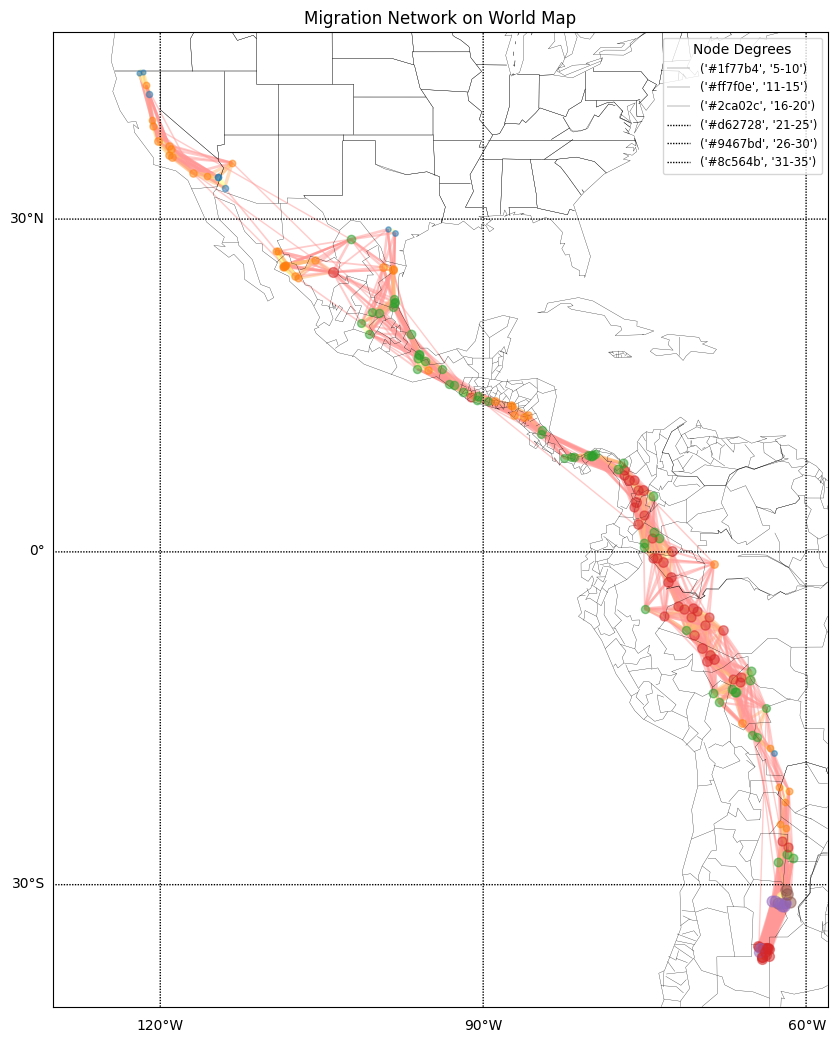

In [34]:
plot_weighted_migration_network_on_world_map(SWH_network)

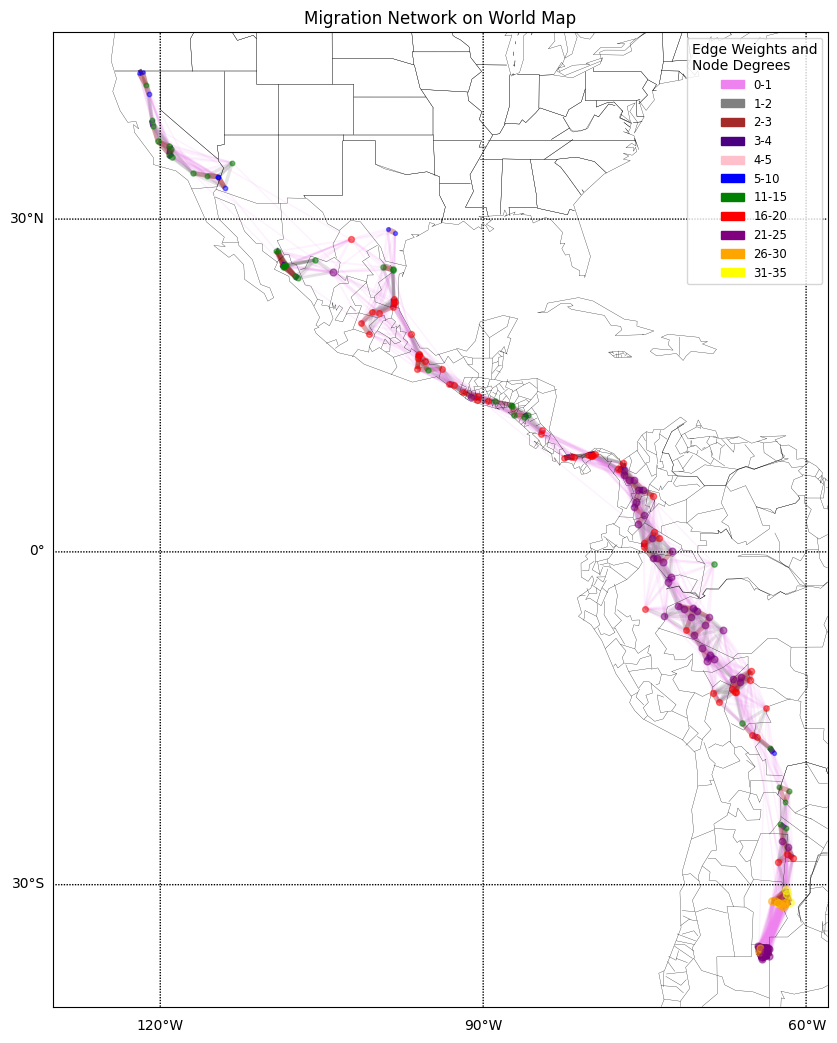

In [42]:
plot_weighted_migration_network_on_world_map(SWH_network)

### different edge weight

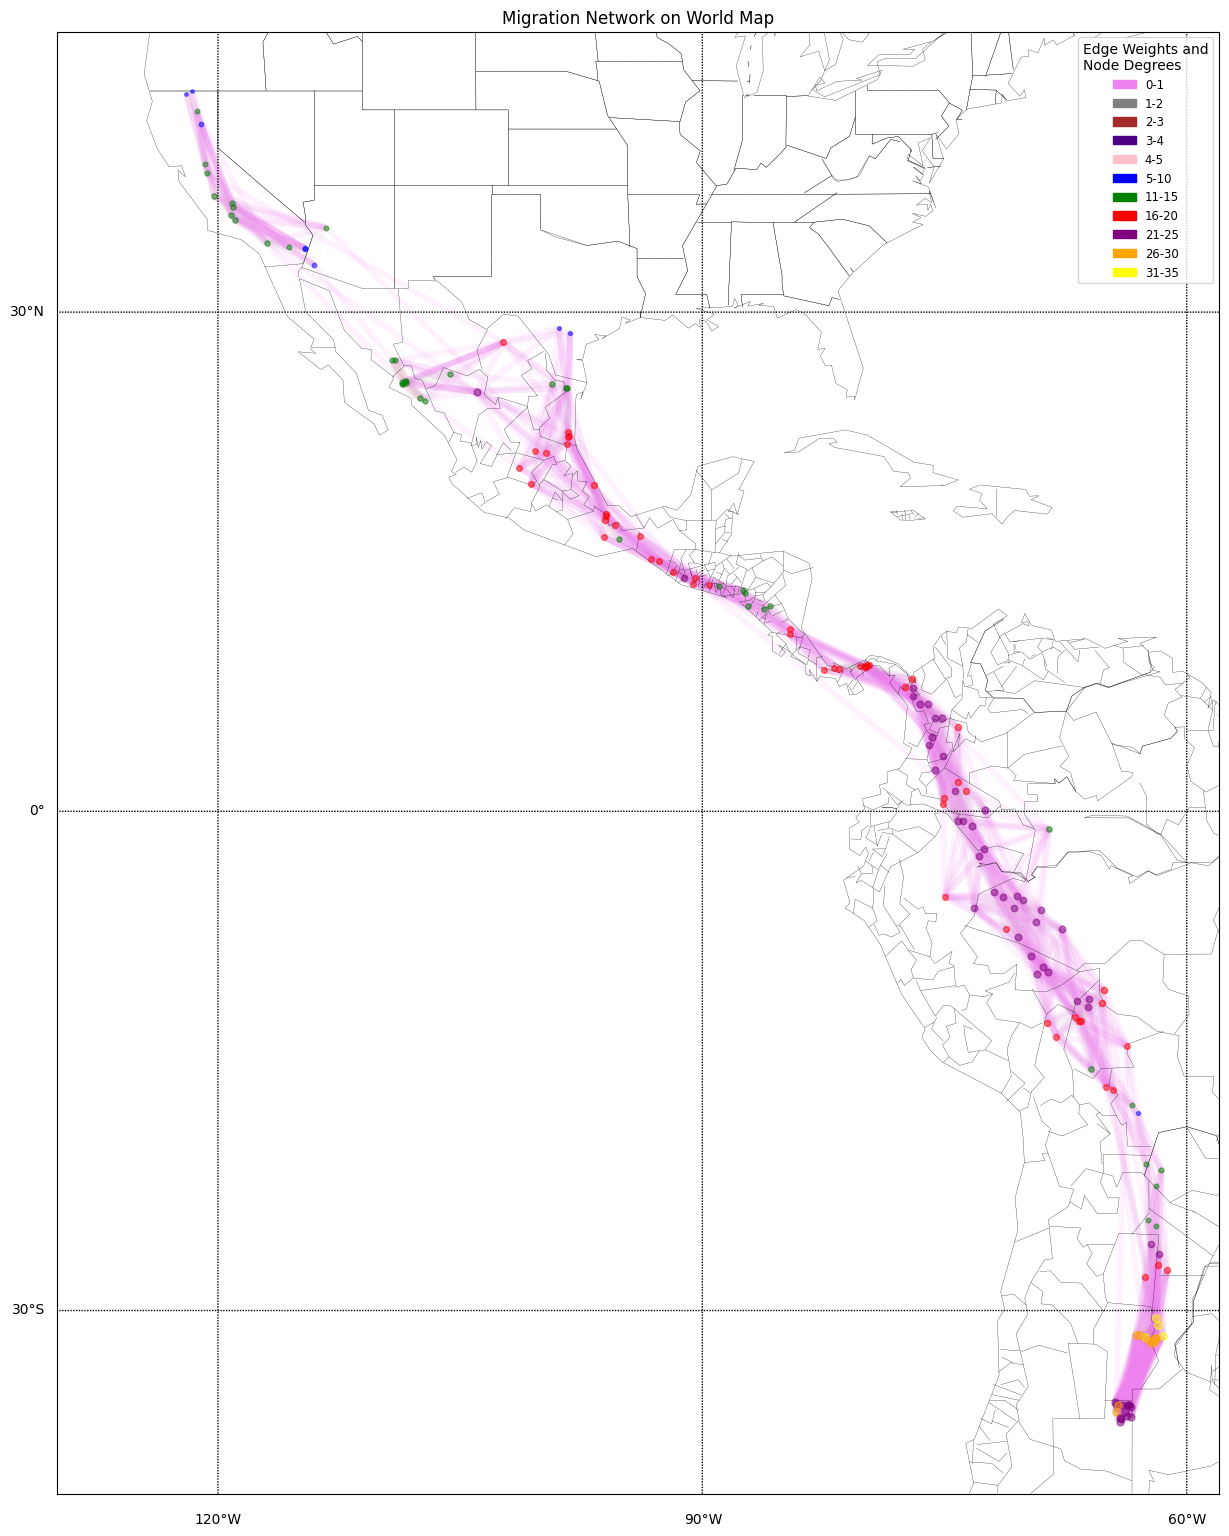

In [78]:
plot_weighted_migration_network_on_world_map(SWH_network)

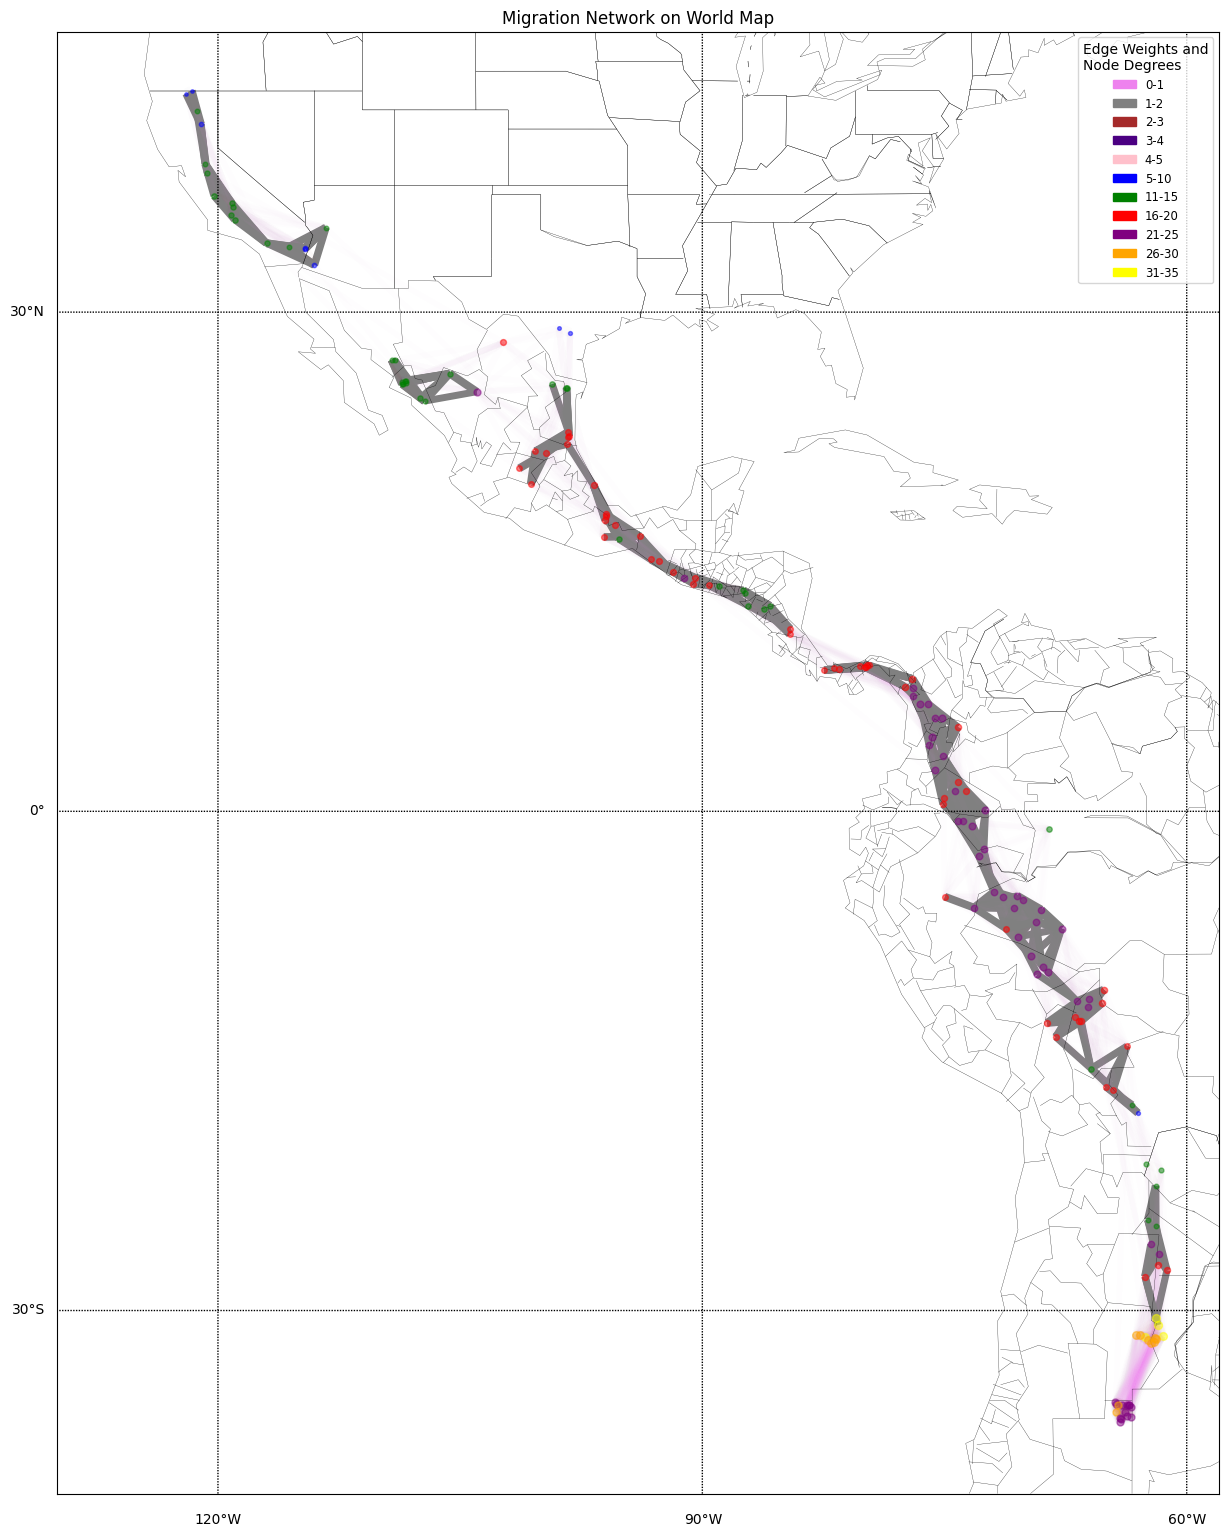

In [76]:
plot_weighted_migration_network_on_world_map(SWH_network)

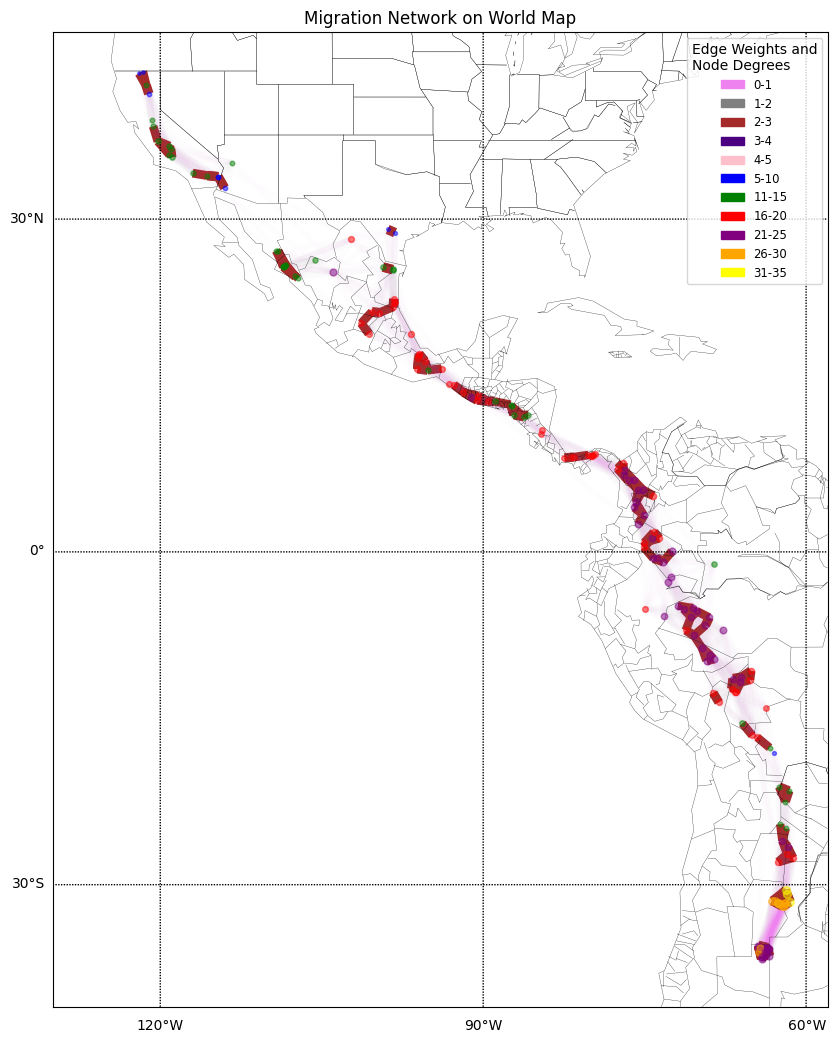

In [70]:
plot_weighted_migration_network_on_world_map(SWH_network)

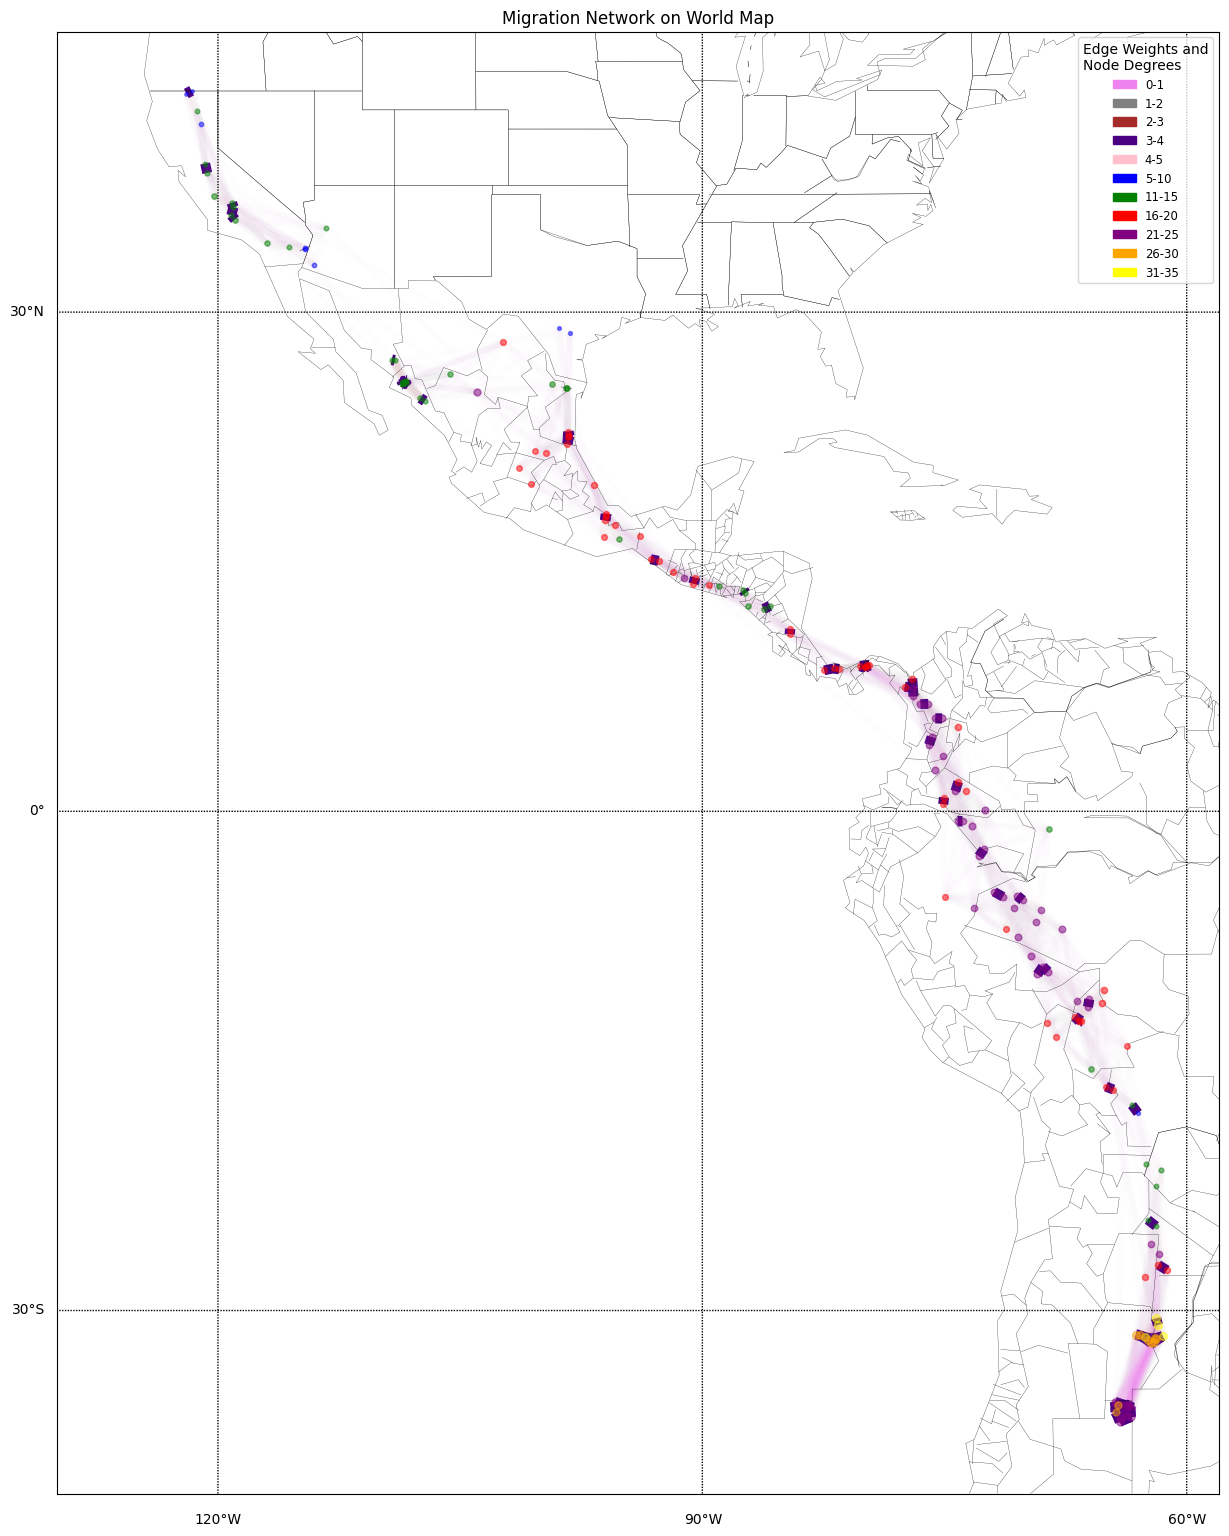

In [74]:
plot_weighted_migration_network_on_world_map(SWH_network)

### zommed view

In [58]:
import matplotlib.patches as mpatches

def plot_weighted_migration_network_res(migration_network, a=-40, b=45, c=-130, d=-58, e=10):
    """
    Plot the migration network on a world map using latitude and longitude values for node positions.
    
    Parameters:
        - migration_network: NetworkX graph representing the migration network.
    """
    # Create a new figure
    plt.figure(figsize=(6, 12))

    # Create a Basemap instance for world map projection
    m = Basemap(projection='mill', llcrnrlat=a, urcrnrlat=b, llcrnrlon=c, urcrnrlon=d)

    # Draw coastlines, countries, and states with reduced opacity
    m.drawcoastlines(linewidth=0.2)
    m.drawcountries(linewidth=0.2)
    m.drawstates(linewidth=0.2)

    # Draw meridians and parallels
    m.drawmeridians(range(-180, 181, e), labels=[0,0,0,1], fontsize=10)
    m.drawparallels(range(-90, 91, e), labels=[1,0,0,0], fontsize=10)

    # Convert latitude and longitude coordinates to map coordinates
    pos = {node: m(node[1], node[0]) for node in migration_network.nodes()}
    
    # Create color maps for edges and nodes based on weight and degree ranges
    # Define colors for edge weight ranges
    edge_colors = ['violet', 'grey', 'brown', 'indigo', 'pink']  
    # Define colors for node degree ranges
    degree_colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']   
    
    # Define edge weight ranges and corresponding labels
    edge_weight_ranges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
    edge_labels = [f'{start}-{end}' for start, end in edge_weight_ranges]
    
    # Define node degree ranges and corresponding labels
    node_degree_ranges = [(5, 10), (11, 15), (16, 20), (21, 25), (26, 30), (31, 35)]
    degree_labels = [f'{start}-{end}' for start, end in node_degree_ranges]
    
    # Draw nodes
    for node, degree in migration_network.degree():
        # Assign node size based on degree
        node_size = degree
        
        # Assign color based on node degree range
        for i, (start, end) in enumerate(node_degree_ranges):
            if start <= degree <= end:
                node_color = degree_colors[i]
                break
        
        nx.draw_networkx_nodes(migration_network, pos, nodelist=[node], node_size=node_size, node_color=node_color, alpha=0.5)
    
    # Draw edges
    for edge in migration_network.edges():
        # Get edge weight
        weight = migration_network[edge[0]][edge[1]].get('weight', 4)  # Default weight to 1 if not set
        
        if weight==4: print(f"weight not found for {edge}")

        # Assign color based on edge weight range
        for i, (start, end) in enumerate(edge_weight_ranges):
            if start <= weight < end:
                edge_color = edge_colors[i]
                break
        
        nx.draw_networkx_edges(migration_network, pos, edgelist=[edge], width=weight + 1, edge_color=edge_color, alpha=0.5)
    
    # Create legend patches for edge colors and node degrees
    edge_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(edge_colors, edge_labels)]
    degree_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(degree_colors, degree_labels)]
    
    # Draw legend for both edge colors and node degrees
    plt.legend(handles=edge_patches + degree_patches, title='Edge Weights and\nNode Degrees', loc='upper right', fontsize=5)

    plt.title('Migration Network on World Map')
    plt.show()

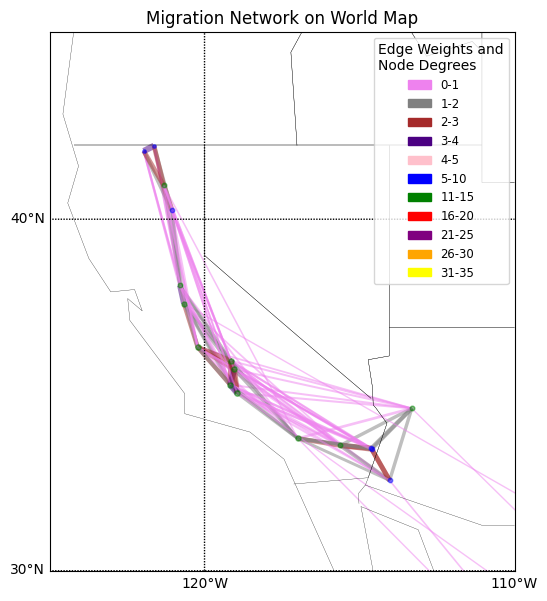

In [50]:
plot_weighted_migration_network_res(SWH_network, a=30, b=45, c=-125, d=-110, e=10)

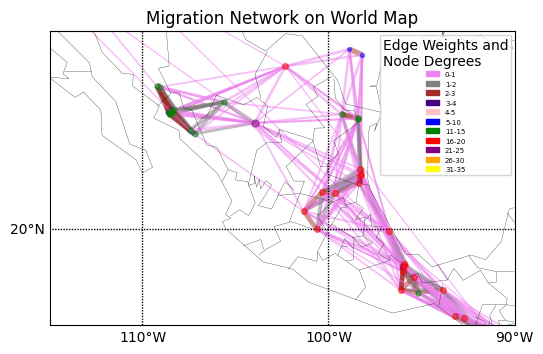

In [59]:
plot_weighted_migration_network_res(SWH_network, a=15, b=30, c=-115, d=-90, e=10)

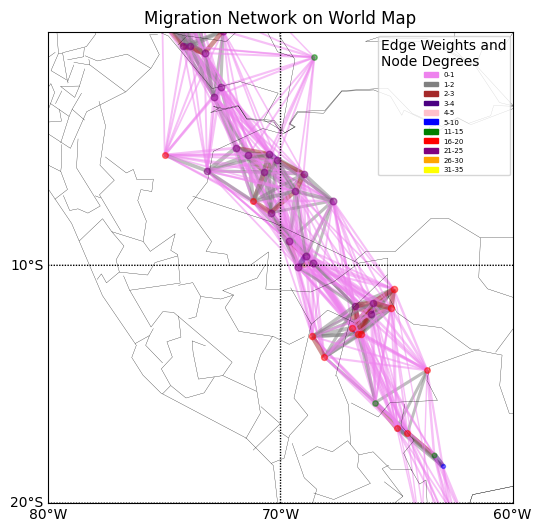

In [60]:
plot_weighted_migration_network_res(SWH_network, a=-20, b=0, c=-80, d=-60, e=10)